In [24]:
pip install graphviz

In [25]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import graphviz 
from sklearn import tree

In [26]:
df=pd.read_csv('Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
X=df.drop(['species'],axis=1)
y=df['species']

In [30]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

In [31]:
clf= DecisionTreeClassifier()
model=clf.fit(Xtrain,ytrain)

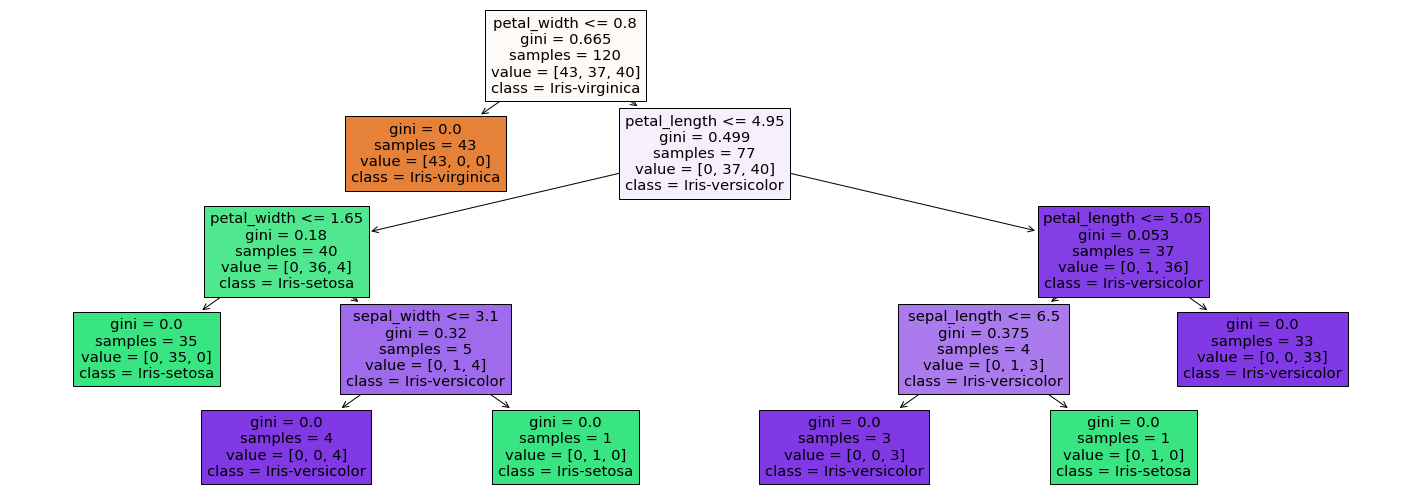

In [32]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(25,9))
_=tree.plot_tree(clf,feature_names=Xtrain.columns,class_names=ytrain.unique(),filled=True)

In [33]:
y_pred=clf.predict(Xtest)

Prediction= pd.DataFrame(y_pred)
Prediction.columns=['Predicted']
Prediction.head()

Actual= pd.DataFrame(ytest)
Actual.columns=['Actual']
Actual=Actual.reset_index()
Actual.head()

Actual.drop('index',axis=1,inplace=True)

compare=pd.concat([Actual,Prediction],axis=1)
compare.head()

,Actual,Predicted
0,Iris-versicolor,Iris-versicolor
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-virginica


In [34]:
unmatched= compare[compare['Actual']!=compare['Predicted']]['Actual'].value_counts().sum()

matched= compare[compare['Actual']==compare['Predicted']]['Actual'].value_counts().sum()

Accuracy= (matched/len(compare['Actual']))*100
print(Accuracy)

96.66666666666667


In [35]:
score= accuracy_score(ytest,y_pred)
score

0.9666666666666667

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [38]:
# Loading iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [39]:
# Standardizing the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [40]:
# Fitting PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

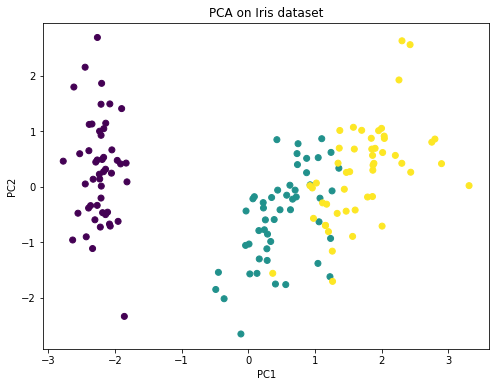

In [41]:
# Plotting the results
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA on Iris dataset')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap

In [43]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [44]:
iris_data = iris["data"]
iris_target = iris["target"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

param_poly = {'coef0': [0, 1], 'degree': [0, 1, 5, 7, 10], 'C': [0.1, 1, 5, 10, 100]}

In [ ]:
# KNN 
KNN = GridSearchCV(KNeighborsClassifier(),{'n_neighbors': [1, 5, 7, 10]},cv=5).fit(X_train, y_train)
# LinearSVC (linear kernel)
SVM_lin = GridSearchCV(SVC(kernel='linear'), {'C': [0.1, 1, 5, 10]},cv=5).fit(X_train, y_train)
# SVC with RBF kernel
SVM_rbf = GridSearchCV(SVC(kernel='rbf'), {'C': [0.1, 1, 5, 10]}, cv=5).fit(X_train, y_train)

# SVC with polynomial (degree 3) kernel
SVM_poly = GridSearchCV(SVC(kernel='poly'),param_poly, cv=5).fit(X_train, y_train)

In [ ]:
# title for the plots
titles = ['KNN Plot',
          'LinearSVC (linear kernel)',
          'SVC with polynomial kernel', 'SVC with RBF kernel']

In [ ]:
for i, clf in enumerate(KNN, SVM_lin, SVM_poly, SVM_rbf):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.title(titles[i])


In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])


In [ ]:
 # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

In [ ]:
# Plot also the training points
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='o',
                    s=55, label='test set')

In [ ]:
X_combined_std = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std,
                      y_combined, classifier=clf,
                      test_idx=range(105, 150))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(x=iris_data[iris_target == 0][:, 0], y=iris_data[iris_target == 0][:, 1], color="tab:blue",
            label="iris_setosa")
plt.scatter(x=iris_data[iris_target == 1][:, 0], y=iris_data[iris_target == 1][:, 1], color="tab:orange",
            label="iris_versicolor")
plt.scatter(x=iris_data[iris_target == 2][:, 0], y=iris_data[iris_target == 2][:, 1], color="tab:green",
            label="iris_virginica")
plt.xticks(())
plt.yticks(())
plt.legend()

plt.show()